In [1]:
# Notebook created by: Nazmi Asri
# 
# Linear regression assumes a linear or straight line relationship between 
#    the input variables (X) and the single output variable (y).
#
# More specifically, that output (y) can be calculated from a linear 
#    combination of the input variables (X). When there is a single input 
#    variable, the method is referred to as a simple linear regression.
#
# In simple linear regression we can use statistics on the training data to 
#    estimate the coefficients required by the model to make predictions on new data.
#
# The line for a simple linear regression model can be written as:
#    y = b0 + b1 * x
#    where b0 and b1 are the coefficients we must estimate from the training data.
#    y is the output, x is the input
#
# To estimate the coefficients b0 and b1:
#    B0 = mean(y) - B1 * mean(x)
#    B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
#
# Source: http://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/

In [2]:
# Swedish Insurances Dataset
# 4 Steps: 
#      1) Calculate Mean and Variance
#      2) Calculate Covariance
#      3) Estimate Coefficients
#      4) Make Predictions

In [3]:
# Import dependencies
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt

seed(1)

x stats: mean=22.905 variance=33809.429
y stats: mean=98.187 variance=472818.290


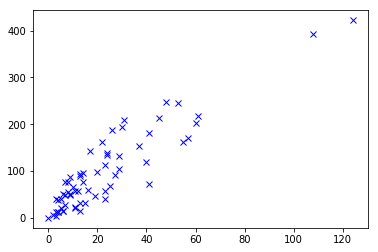

In [4]:
# 1. Calculate Mean and Variance
# First step is to estimate the mean and the variance of both the input and output variables from the training data

# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
# Variance is the sum squared difference for each value from the mean value
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip().replace('\ufeff', ''))

# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy

# Load and prepare data
filename = 'insurances.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)

# Calculate mean and variance
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)

# Print the mean and variance
print('x stats: mean=%.3f variance=%.3f' %(mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' %(mean_y, var_y))

# Display graph of x and y
plt.plot(x, y, 'bx')
plt.show()

In [5]:
# 2. Calculate Covariance

# Covariance of two groups of numbers describes how those numbers change together
# Covariance is a generalization of correlation. 
# Correlation describes the relationship between two groups of numbers, 
#     whereas covariance can describe the relationship between two or more groups of numbers.
# Additionally, covariance can be normalized to produce a correlation value

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

# Calculate covariance
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 115419.424


In [6]:
# 3. Estimate Coefficients 

# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

# Calculate coefficients
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=19.994, B1=3.414


RMSE: 33.630


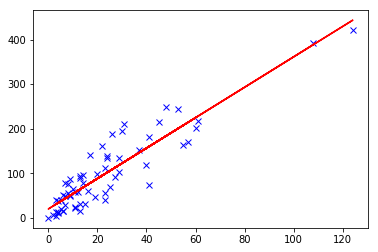

In [7]:
# 4. Make Predictions
# The simple linear regression model is a line defined by coefficients estimated from training data

def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse

# Generate the test_set
test_set = list()
for row in dataset:
    row_copy = list(row)
    row_copy[-1] = None
    test_set.append(row_copy)

# Test simple linear regression
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
predicted = simple_linear_regression(dataset, test_set)
print('RMSE: %.3f' % (rmse))

# Display graph
plt.plot(x, y, 'bx')
plt.plot(x, predicted, 'r')
plt.show()